### Name : Parth Hitesh Kothari
### Roll no.: 2303121012


# Importing Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable
%matplotlib inline

# Intializing the grid
Here as explained in the practical class, I am Intializing the grid where all the fields will be plotted.

In [2]:
# Number of gridpoints
N = 64

# Generated grid
x = np.linspace(-10, 10, N, endpoint=True)
y = np.linspace(-10, 10, N, endpoint=True)
z = np.linspace(-10, 10, N, endpoint=True)
X, Y, Z = np.meshgrid(x, y, z)


# Defining a Three dimensional Plotter for repeated use

In [3]:
def Three_d_plotter(grid,name):
  # Creating  a 3D plot
  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(111, projection='3d')

  # Flatten the grid coordinates and grid values for scatter plot
  x_flatten = X.flatten()
  y_flatten = Y.flatten()
  z_flatten = Z.flatten()
  grid_flatten = grid.flatten()

  # Plot the 3D scatter plot
  scatter = ax.scatter(x_flatten, y_flatten, z_flatten, c=grid_flatten, cmap='Spectral')

  # Create a ScalarMappable for colormap
  sm = ScalarMappable(cmap='Spectral')
  sm.set_array(grid_flatten)
  fig.colorbar(sm, ax=ax, label='Grid Value')

  # Set labels and title
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.set_title(f'{name}')

  plt.show()

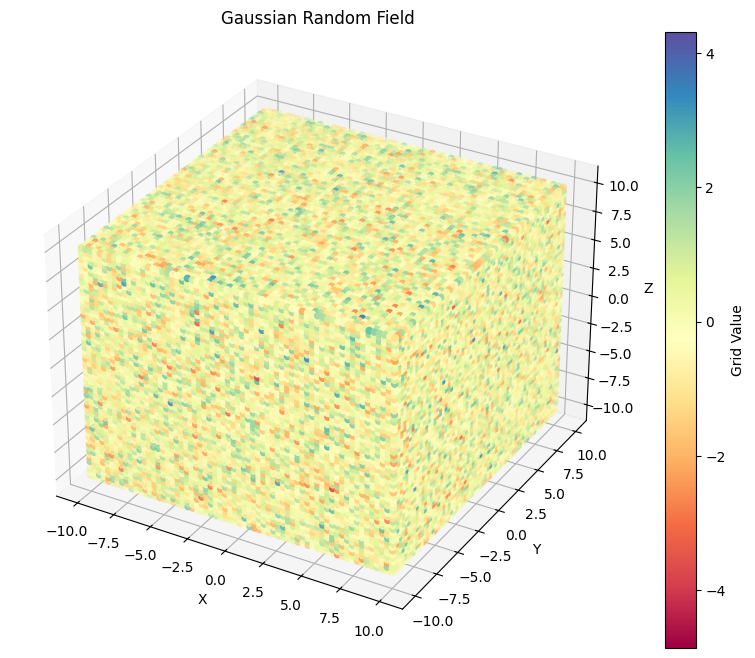

Mean of the field: 0.003572342441620321
Variance of the field: 0.9967310032166098


In [4]:
# Gaussian random field generated of 64 x 64 x 64 size 
grid_3d = np.random.normal(0, 1, (N, N, N))

Three_d_plotter(grid_3d, 'Gaussian Random Field')
print(f'Mean of the field: {np.mean(grid_3d)}')    #Calculating the mean and variance of the field
print(f'Variance of the field: {np.var(grid_3d)}')

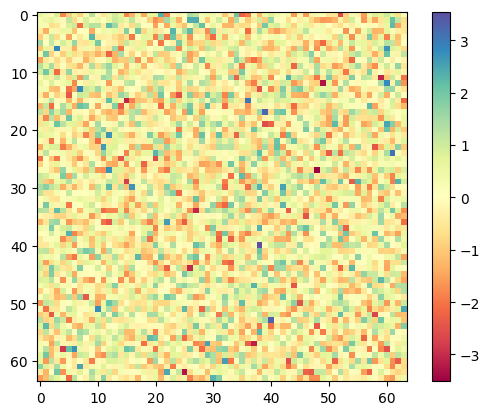

In [5]:
plt.imshow(grid_3d[:,:,0] , cmap='Spectral')  # A 2D slice of the 3D plot. this represensts the z = 0 slide
plt.colorbar()

# Spherical Filter function
Defining the linspace was bit tricky. Point was to make the filter same size as the gaussian field and not trying to affect the original space. so using the origin itself
to normalizing all the grid to value.

In [6]:
def sphere_3D(Number_of_points,radius,normalization):
  
  origin_of_sphere = (Number_of_points//2)  -1   #This solves the problem for odd number of points
  x = np.linspace(-origin_of_sphere, Number_of_points - origin_of_sphere, Number_of_points) 
  y = np.linspace(-origin_of_sphere, Number_of_points-  origin_of_sphere, Number_of_points)
  z = np.linspace(-origin_of_sphere, Number_of_points - origin_of_sphere, Number_of_points)
  X, Y, Z = np.meshgrid(x, y, z)
    # Initialize grid with zeros
  grid_new = np.zeros((Number_of_points, Number_of_points, Number_of_points))


  # Calculate distances from the center
  distances = np.sqrt(X**2 + Y**2 + Z**2)



  # Set values inside the sphere to 1
  grid_new[distances <= radius] = 1

  if normalization == 'Yes':
    c =  grid_new / np.sum(grid_new)
    return c
  elif normalization == 'No':
    c = grid_new
    return c
  else:
    raise ValueError('Pls provide Yes or No as parameter')
  
  # fig = plt.figure(figsize=(origin_of_sphere, 8))
  # ax = fig.add_subplot(111, projection='3d')
  # ax.scatter(X, Y, Z, c = c.flatten(), cmap='Spectral')
  # ax.set_xlabel('X')
  # ax.set_ylabel('Y')
  # ax.set_zlabel('Z')
  # ax.set_title('Sphere on 64^3 Grid')
  # plt.show()


## FFTs Function
Here I take the FFT of both the filter and gaussian and shifting the origin. Then taking inverse fourier transform to get the convovled function.

In [7]:
def FFT_to_invt(rad,normalization):
    sphere = sphere_3D(64,rad,normalization)                      
    sphere_filter_fft = np.fft.fftn(sphere)             #Taking FFT of the filter
    sphere_shift = np.fft.fftshift(sphere_filter_fft)   #Shifting the origin

    fft_grid = np.fft.fftn(grid_3d)                     #Same for the grid
    fft_shift_grid = np.fft.fftshift(fft_grid)

    FFT_of_both = fft_shift_grid * sphere_shift
    inverse_fft = np.fft.ifftn(FFT_of_both)
    return np.abs(inverse_fft)
    

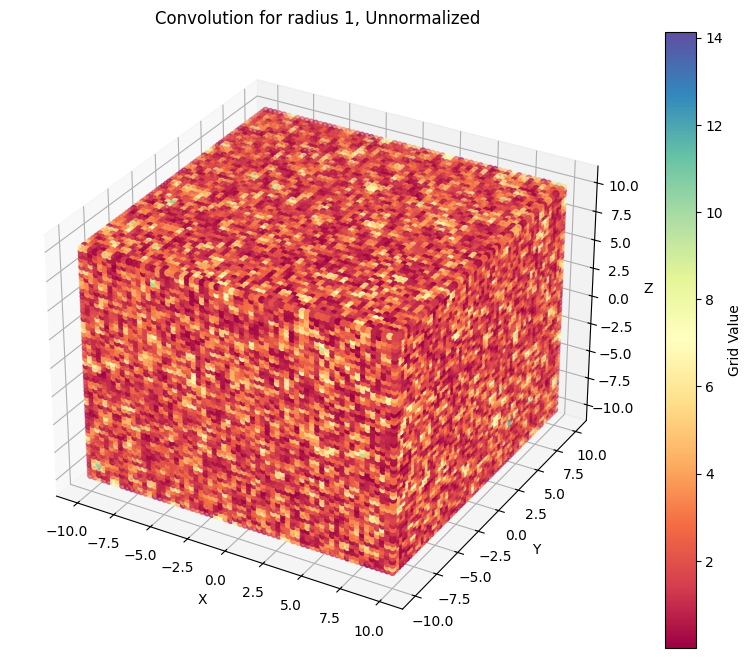

In [8]:
V = FFT_to_invt(1,'No')    #Taking Radius to be 1
Three_d_plotter(V,'Convolution for radius 1, Unnormalized')

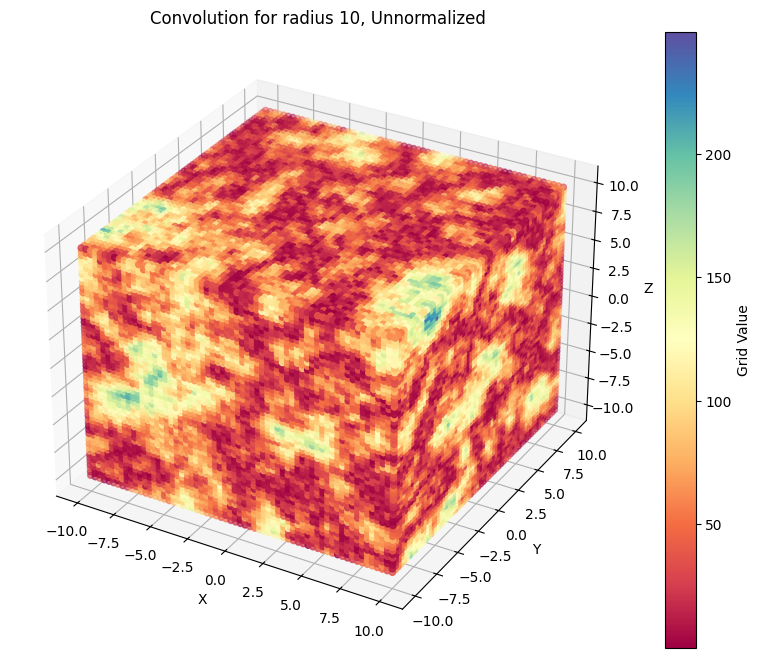

In [9]:
V = FFT_to_invt(10,'No')    #Taking Radius to be 10
Three_d_plotter(V,'Convolution for radius 10, Unnormalized')

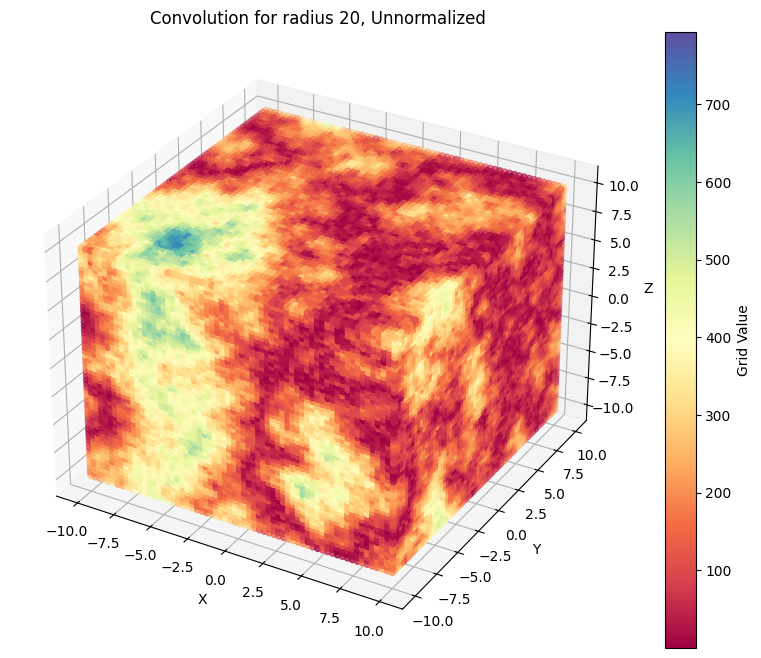

In [10]:
z= FFT_to_invt(20,'No')    #Taking Radius to be 20
Three_d_plotter(z,'Convolution for radius 20, Unnormalized')

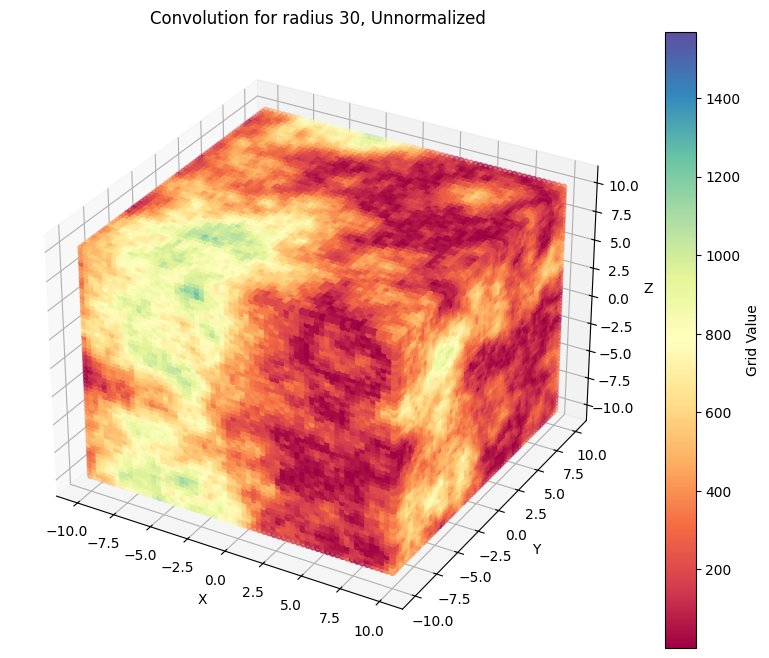

In [11]:
m= FFT_to_invt(30,'No')    #Taking Radius to be 30
Three_d_plotter(m,'Convolution for radius 30, Unnormalized')

# The main part of the problem.
The mean and variance should increase if the filter is not normalized, leading to saturation. As expected the mean and variance do increase with radius.

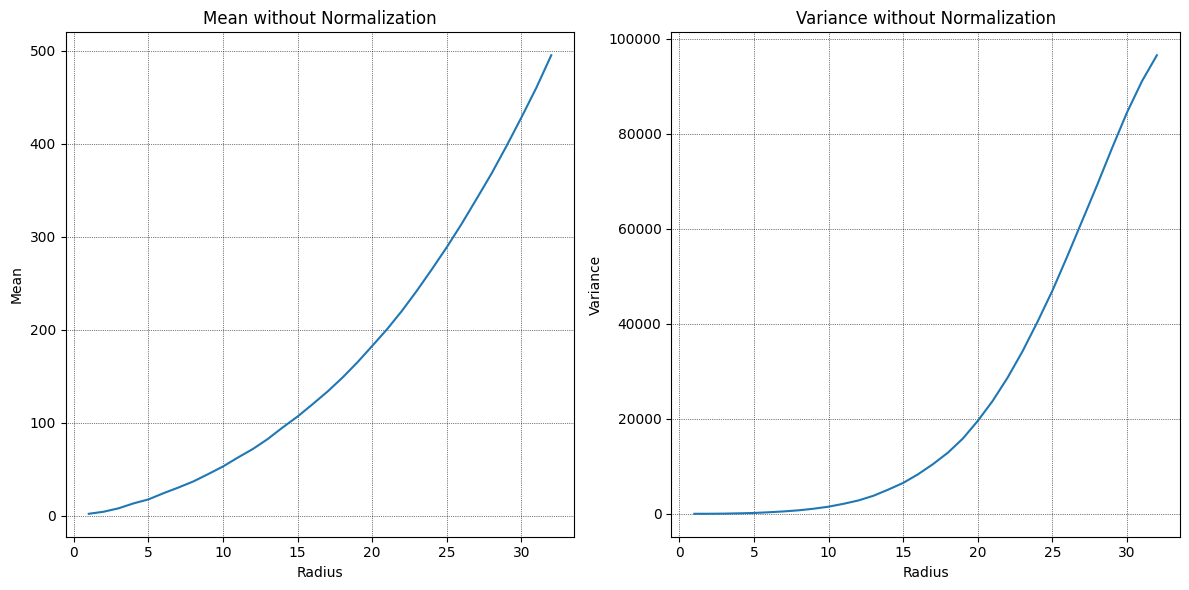

In [12]:
mean = np.array([])
variance = np.array([])
radius = np.arange(1,33)
for i in radius:
    bla = FFT_to_invt(i,'No')
    mean_current = np.mean(bla)
    variance_current = np.var(bla)
    mean = np.append(mean, mean_current)
    variance = np.append(variance, variance_current)

# Plotting
plt.figure(figsize=(12, 6))

# Plot mean
plt.subplot(1, 2, 1)
plt.plot(radius, mean)
plt.title('Mean without Normalization')
plt.xlabel('Radius')
plt.ylabel('Mean')
plt.grid(color ='black' , linestyle = ':',linewidth = '0.5')
# Plot variance
plt.subplot(1, 2, 2)
plt.plot(radius, variance)
plt.title('Variance without Normalization')
plt.xlabel('Radius')
plt.ylabel('Variance')
plt.grid(color ='black' , linestyle = ':',linewidth = '0.5')

plt.tight_layout()
plt.show()
    

# Normalized
As expected, after normalization, the mean and variance decrease and do not get saturated.

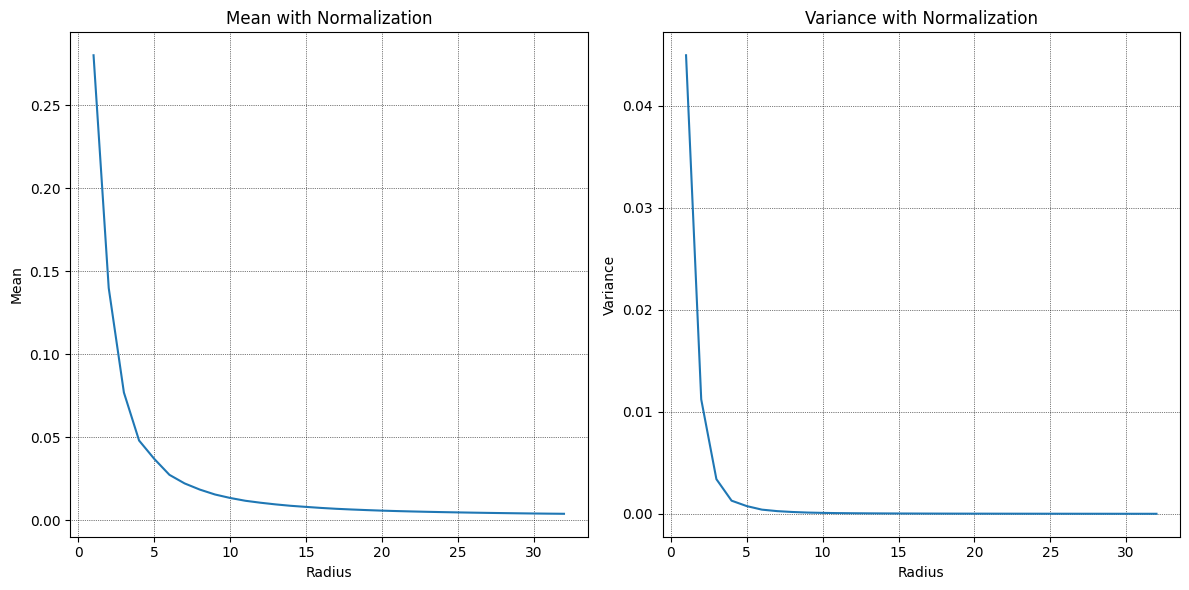

In [13]:
mean = np.array([])
variance = np.array([])
radius = np.arange(1,33)
for i in radius:
    bla = FFT_to_invt(i,'Yes')
    mean_current = np.mean(bla)
    variance_current = np.var(bla)
    mean = np.append(mean, mean_current)
    variance = np.append(variance, variance_current)

# Plotting
plt.figure(figsize=(12, 6))

# Plot mean
plt.subplot(1, 2, 1)
plt.plot(radius, mean)
plt.title('Mean with Normalization')
plt.xlabel('Radius')
plt.ylabel('Mean')
plt.grid(color ='black' , linestyle = ':',linewidth = '0.5')
# Plot variance
plt.subplot(1, 2, 2)
plt.plot(radius, variance)
plt.title('Variance with Normalization')
plt.xlabel('Radius')
plt.ylabel('Variance')
plt.grid(color ='black' , linestyle = ':',linewidth = '0.5')

plt.tight_layout()
plt.show()

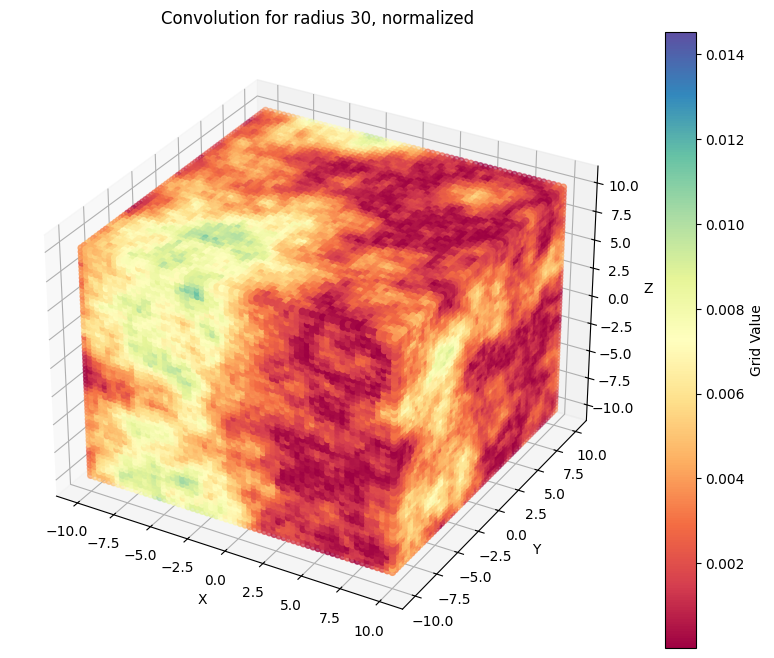

In [14]:
d= FFT_to_invt(30,'Yes')    #Taking Radius to be 30
Three_d_plotter(d,'Convolution for radius 30, normalized')

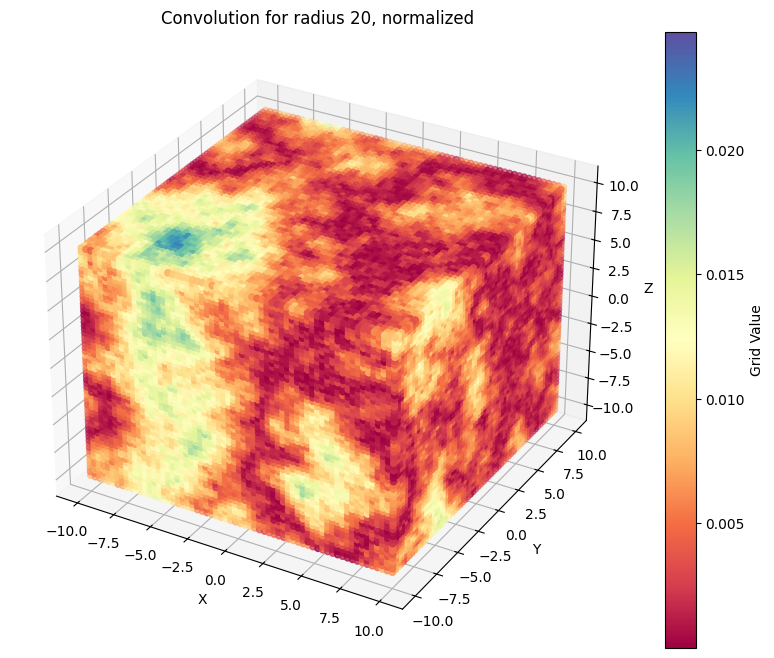

In [15]:
p= FFT_to_invt(20,'Yes')    #Taking Radius to be 20
Three_d_plotter(p,'Convolution for radius 20, normalized')

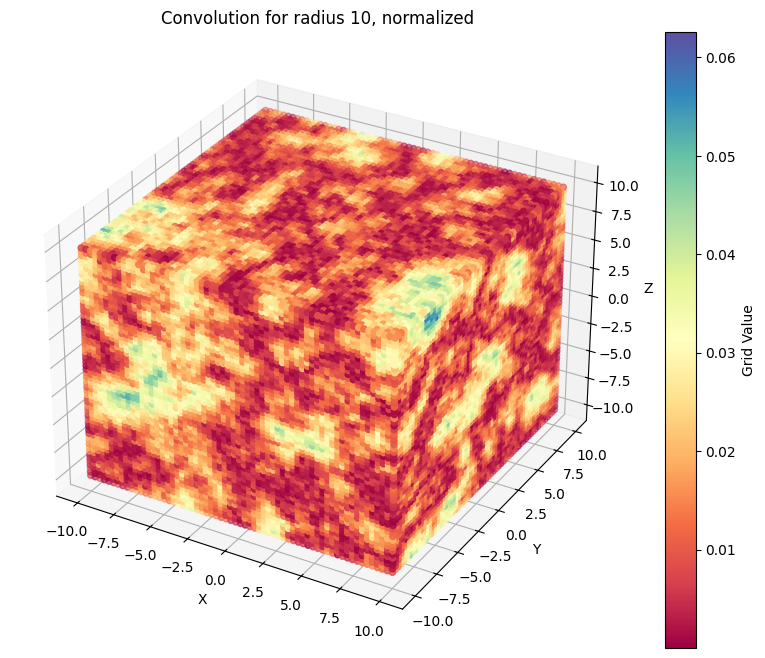

In [16]:
q= FFT_to_invt(10,'Yes')    #Taking Radius to be 20
Three_d_plotter(q,'Convolution for radius 10, normalized')

# Conclusion

* Normalization was indeed required as after convolution the values scale up. 
* The underlying assumption for the field is that the field is periodic. 